#**Build a Model Free Reinforcment Learning Agent that plays BlackJack**
# Implement Black Jack Player Using a Q learning table

The Black Jack Player will be set by building a new class called BlackJackPlayer.
The Q table will be implemented by using an inner dictionary in the class BlackJackPlayer.

Gym Documentation: https://www.gymlibrary.dev/environments/toy_text/blackjack/

Blackjack is a card game where the goal is to beat the dealer by obtaining cards that sum to closer to 21 (without going over 21) than the dealers cards.


#**Description**


---


#Card Values:

*   Face cards (Jack, Queen, King) have a point value of 10.
*   Aces can either count as 11 (called a ‘usable ace’) or 1.
*   Numerical cards (2-9) have a value equal to their number.

This game is played with an infinite deck (or with replacement). The game starts with the dealer having one face up and one face down card, while the player has two face up cards.

The player can request additional cards (hit, action=1) until they decide to stop (stick, action=0) or exceed 21 (bust, immediate loss). After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater. If the dealer goes bust, the player wins. If neither the player nor the dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

#Action Space
There are two actions: stick(stop) (0), and hit (1).

#Observation Space
The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

This environment corresponds to the version of the blackjack problem described in Example 5.1 in Reinforcement Learning: An Introduction by Sutton and Barto (http://incompleteideas.net/book/the-book-2nd.html)

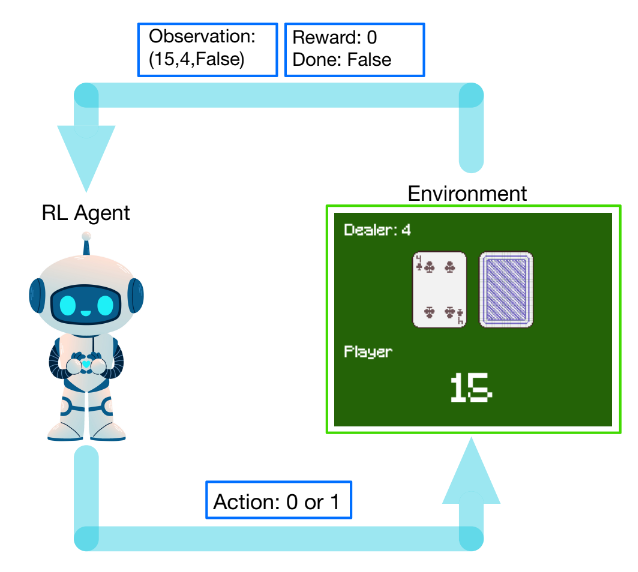

In [23]:
pip install gymnasium ##Install library

In [24]:
import numpy as np
import gymnasium as gym
import random
import time
from IPython.display import clear_output

In [25]:
env = gym.make('Blackjack-v1', natural=False, sab=False,render_mode='rgb_array') #Build env

#**Build a new class called BlackJackPlayer**
   Implement a Q table using an inner dictionary.

   Use Epsilon Greedy policy when choosing the next action.

   Update Q table by using TD (Temporal Difference) Q learning:
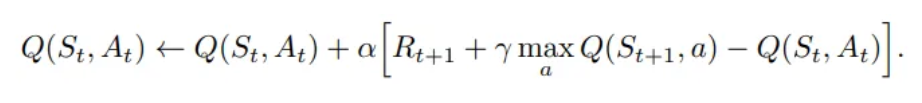




In [52]:
from typing_extensions import DefaultDict
class BlackJackPlayer:
    def __init__(self, env,
                 learning_rate:float,
                 initial_epsilon:float,
                 epsilon_decay:float,
                 final_epsilon:float,
                 discount_factor:float):
        self.env = env
        self.action_space_size = env.action_space.n
        self.q_table = DefaultDict(lambda: np.zeros(self.action_space_size)) ###Initialize Q table dictionary
        self.lr = learning_rate
        self.initial_epsilon = initial_epsilon
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon
        self.discount_factor = discount_factor
        self.training_error = []

    def choose_action(self, state):                   #### Set choose action function
        if random.uniform(0, 1) > self.epsilon:       #### Use Epsilon greedy policy
            return random.randint(0, 1)
        else:
            return int(np.argmax(self.q_table[state]))

    def update_q_table(self, state, action, reward, next_state, done):          #### Set update Q table function
        future_Q = 0 if done else np.max(self.q_table[next_state])
        temp_delta = reward + self.discount_factor * future_Q - self.q_table[state][action]
        self.q_table[state][action] += self.lr * temp_delta
        self.training_error.append(temp_delta)

    def decay_epsilon(self):
        self.epsilon = min(self.epsilon + self.epsilon_decay, self.final_epsilon)

In [66]:
#Hyperparameters
N_rounds = 4
N_episodes = 100000
max_steps_per_episode = 200
lr =  0.01
initial_epsilon = 0.01
epsilon_decay = 1/(N_episodes*N_rounds)
final_epsilon = 1
discount_factor = 0.99

player = BlackJackPlayer(env, lr, initial_epsilon, epsilon_decay, final_epsilon, discount_factor)


#Start Training

In [67]:
rewards_all_episodes = []
max_steps_per_episode = 200

In [68]:
# Q-learning algorithm
player.epsilon = player.initial_epsilon
for idx in range(N_rounds):
    print(player.epsilon )
    for episode in range(N_episodes):
        # initialize new episode params
        state = env.reset()[0]
        done = False
        rewards_current_episode = 0

        for step in range(max_steps_per_episode):

            # Choose action greedily
            action = player.choose_action(state)

            # Take new action
            new_state, reward, done, truncated, info = env.step(action)

            # Update Q-table for Q(s,a)
            player.update_q_table(state, action, reward, new_state, done)

            # Set new state
            state = new_state
            # Add new reward
            rewards_current_episode += reward
            if (done == True) or (truncated == True):
                break
        # Exploration rate decay
        player.decay_epsilon()
        # Add current episode reward to total rewards list
        rewards_all_episodes.append(rewards_current_episode)

0.01
0.259999999999586
0.5100000000012238
0.7600000000028616


In [71]:
print(player.epsilon )

1


In [70]:
# Calculate and print the average reward per thousand episodes
rewards_per_10thousand_episodes = np.split(np.array(rewards_all_episodes),4*N_episodes/10000)
count = 10000

print("********Average reward per 10 thousand episodes********\n")
for r in rewards_per_10thousand_episodes:
    print(count, ": ", str(sum(r/10000)))
    count += 10000

********Average reward per 10 thousand episodes********

10000 :  -0.3650999999999761
20000 :  -0.3816999999999743
30000 :  -0.3852999999999739
40000 :  -0.35399999999997733
50000 :  -0.3368999999999792
60000 :  -0.3308999999999799
70000 :  -0.33309999999997963
80000 :  -0.32549999999998047
90000 :  -0.31389999999998175
100000 :  -0.3281999999999802
110000 :  -0.3180999999999813
120000 :  -0.2988999999999834
130000 :  -0.31199999999998196
140000 :  -0.2798999999999855
150000 :  -0.2625999999999874
160000 :  -0.25379999999998837
170000 :  -0.2634999999999873
180000 :  -0.2625999999999874
190000 :  -0.2270999999999913
200000 :  -0.23859999999999004
210000 :  -0.22659999999999136
220000 :  -0.1954999999999948
230000 :  -0.19929999999999437
240000 :  -0.18869999999999554
250000 :  -0.19249999999999512
260000 :  -0.16799999999999782
270000 :  -0.1744999999999971
280000 :  -0.17569999999999697
290000 :  -0.15309999999999946
300000 :  -0.14110000000000078
310000 :  -0.11870000000000237
320000

From this printout, we can see our average reward per 10 thousand episodes did indeed progress over time.

Let's take a second to understand how we can interpret these results. Our agent played 400,000 episodes. For each episode, the agent received a reward of 1 if it won, otherwise, it received a reward of -1 if it lost to the dealer, or a reward of 0 if there was a draw. From this printout we can see that by the end of training, the Agent is winning 10 times more compared to the beging of the training (0.037 vs. 0.36). It can not win 100% of the time because the game is still a gambling game depending on the randomness of the cards, but it did significantly improved.




#**Let's Watch the Agent Play**
These blocks of code are going to allow us to watch our trained agent play BlackJack using the knowledge it's gained from the training we completed.

In [72]:
# Imports for video creation
import cv2
from gym.wrappers.record_video import RecordVideo
from IPython.display import display, HTML
import io
import base64
from google.colab.patches import cv2_imshow
from moviepy.editor import VideoFileClip, AudioFileClip

In [73]:
# Create Images for winning or loosing
image_path_Lose = 'you lose.jpg'
image_Lose = cv2.imread(image_path_Lose)
image_path_goal = 'you win.jpg'
image_goal = cv2.imread(image_path_goal)
image_Lose = cv2.resize(image_Lose, (600,500), interpolation=cv2.INTER_AREA)
image_goal = cv2.resize(image_goal, (600,500), interpolation=cv2.INTER_AREA)
image_path_Hit = 'hit me.jpeg'
image_hit = cv2.imread(image_path_Hit)
image_hit = cv2.resize(image_hit, (600,500), interpolation=cv2.INTER_AREA)
image_path_Stop = 'stop.png'
image_stop = cv2.imread(image_path_Stop)
image_stop = cv2.resize(image_stop, (600,500), interpolation=cv2.INTER_AREA)


In [74]:
##Visualise
# Watch our agent play Frozen Lake by playing the best action
# from each state according to the Q-table
states_tryout = []
last_state = None
for episode in range(0,3):
    player.epsilon = player.final_epsilon
    # initialize new episode params
    state = env.reset()[0]
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):
        clear_output(wait=True)

        states_tryout.append(env.render())
        # Choose action greedily
        action = player.choose_action(state)
        if action == 0 :
            print("***Stop***")
            states_tryout.append(image_stop)
        if action == 1 :
            print("***Hit Me***")
            states_tryout.append(image_hit)

        # Take new action
        new_state, reward, done, truncated, info = env.step(action)

        if done or truncated :
            clear_output(wait=True)
            states_tryout.append(env.render())
            #print(env.render())
            if reward == 1:
                # Agent reached the goal and won episode
                print("****You reached the goal!****")
                states_tryout.append(image_goal)
                last_state = image_goal
                time.sleep(1)
            else:
                # Agent stepped in a hole and lost episode
                print("****You Lose!****")
                states_tryout.append(image_Lose)
                last_state = image_Lose
                time.sleep(1)
                clear_output(wait=True)
            break
        state = new_state
states_tryout.append(last_state)
states_tryout.append(last_state)

****You reached the goal!****


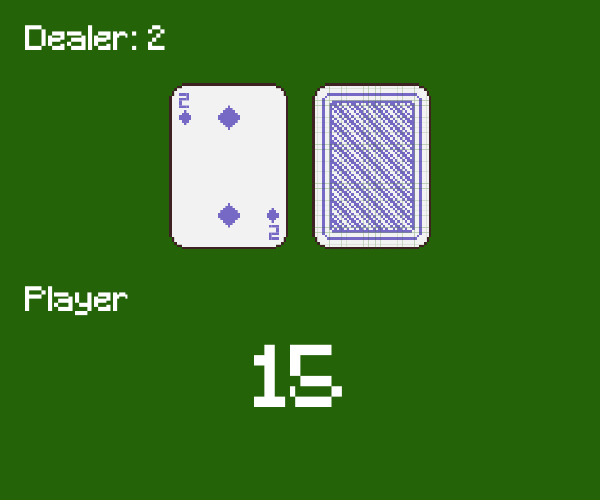

In [75]:
x = states_tryout[-4] # Just checking the size of the images in future video
x.shape
cv2_imshow(x)
#for x in states_tryout:
    #cv2_imshow(x)

# Create Video with Background Music !

In [76]:

def create_video(name, states_tryout, music_path='path/to/your/music.mp3', fps=1):
    # Convert image arrays to a video
    image_arrays = np.array(states_tryout)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter('output_video_{}.mp4'.format(name), fourcc, fps, (image_arrays[0].shape[1], image_arrays[0].shape[0]))
    for image_array in image_arrays:
        video_writer.write(image_array)
    video_writer.release()  # Release the video writer before loading the clip

    # Load the video clip
    video_clip = VideoFileClip('output_video_{}.mp4'.format(name))

    # Load the audio clip
    audio_clip = AudioFileClip(music_path)

    # Trim audio to match the duration of the video
    audio_clip = audio_clip.subclip(0, video_clip.duration)

    # Add the audio to the video clip
    video_clip = video_clip.set_audio(audio_clip)

    # Write the final video with audio
    video_clip.write_videofile('output_video_with_audio_{}.mp4'.format(name), codec='libx264', audio_codec='aac')

    # Display the video with audio in Colab
    video_path = 'output_video_with_audio_{}.mp4'.format(name)
    video_file = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video_file)
    HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii')))

# Example usage
# create_video('example', states_tryout, music_path='path/to/your/music.mp3', fps=0.5)


In [77]:
create_video("test",states_tryout,'Players.mp3',0.5)

Moviepy - Building video output_video_with_audio_test.mp4.
MoviePy - Writing audio in output_video_with_audio_testTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video output_video_with_audio_test.mp4



Moviepy - Done !
Moviepy - video ready output_video_with_audio_test.mp4
